# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio




Objetivo do Projeto:

- Criar um modelo que preveja a renda de um cliente com base em suas características.
- Esse modelo pode ser usado para oferecer produtos financeiros, ajustar limites de crédito, entre outros.

De modo que utilizadores do modelo possam:
- Melhorar a segmentação de clientes.
- Otimizar a concessão de crédito.
- Reduzir os riscos de inadimplência.

Sendo assim seguiremos da presunção de que esses fatores podem influenciar na renda de uma pessoa:
- Idade, escolaridade, ocupação.
- Histórico financeiro, dívidas.
- Localização, estado civil.

Utilizando os fatores que estejam presentes no dataset utilizado.

## Etapa 2 Crisp-DM: Entendimento dos dados







#### Carregando os pacotes


In [54]:
%matplotlib inline 
#deixar plt.show aparecer no vscode#

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from ydata_profiling import ProfileReport
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


#### Carregando os dados

In [56]:
df = pd.read_csv("./input/previsao_de_renda.csv")
df = df.drop('Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   id_cliente             15000 non-null  int64  
 2   sexo                   15000 non-null  object 
 3   posse_de_veiculo       15000 non-null  bool   
 4   posse_de_imovel        15000 non-null  bool   
 5   qtd_filhos             15000 non-null  int64  
 6   tipo_renda             15000 non-null  object 
 7   educacao               15000 non-null  object 
 8   estado_civil           15000 non-null  object 
 9   tipo_residencia        15000 non-null  object 
 10  idade                  15000 non-null  int64  
 11  tempo_emprego          12427 non-null  float64
 12  qt_pessoas_residencia  15000 non-null  float64
 13  renda                  15000 non-null  float64
dtypes: bool(2), float64(3), int64(3), object(6)
memory usa

In [57]:
df.head()

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


### Dicionário de dados

| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de obtenção dos dados do cliente                                      | object|
| id_cliente              |  ID do cliente                                      | int64|
| sexo                    |  Sexo do cliente, F - feminino; M - masculino                                      |object|
| posse_de_veiculo        |  Se o cliente possui veiculo, True - possui; False - não possui  | bool|
| posse_de_imovel         |  Se o cliente possui imovel, True - possui; False - não possui|bool|
| qtd_filhos              |  Numero de filhos do cliente                                      | int64I|
| tipo_renda              |  Tipo de renda (ex: Assalariado, Servidor Público, Empresário)                                      | object|
| educacao                |  Nível de escolaridade                              | object|
| estado_civil            |  Estado civil                                     | object|
| tipo_residencia         |  Tipo de residencia (ex: Casa, Aluguel, Estúdio)                                  | object|
| idade                   |  Idade do cliente                                    | int64|
| tempo_emprego           |  Tempo de emprego em anos                                      | Float64|
| qt_pessoas_residencia   |  Quantidade de pessoas morando com o cliente                                     | float64|
| renda                   |  Variavel alvo, renda do cliente                                     | float64|



#### Entendimento dos dados - Univariada

In [58]:
prof = ProfileReport(df, explorative = True, minimal = True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [59]:
prof.to_file('./output/Analise_renda.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Olhando agora para a destribuição da variavel 'renda' (variavel alvo):

In [60]:
df["renda"].describe()

count     15000.000000
mean       5697.287057
std        8266.816289
min         118.710000
25%        2026.110000
50%        3499.720000
75%        6392.167500
max      245141.670000
Name: renda, dtype: float64

Criação de histograma para melhor visualização:

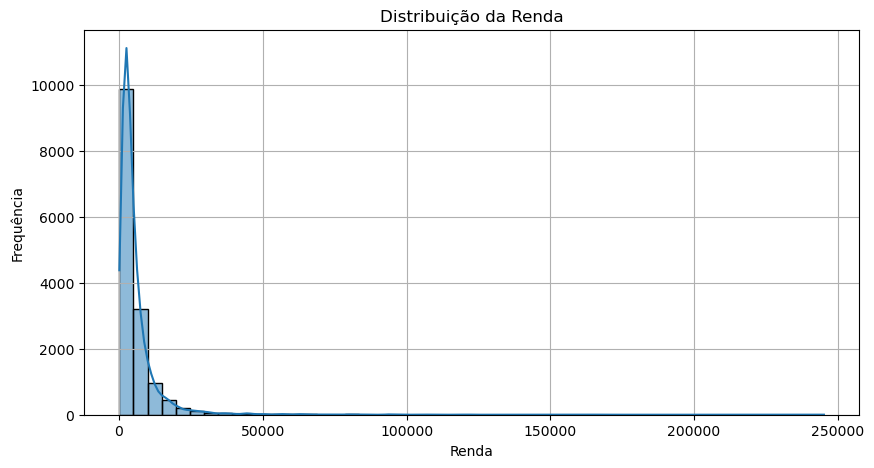

In [61]:
plt.figure(figsize=(10,5))
sns.histplot(df["renda"], bins=50, kde=True)
plt.title("Distribuição da Renda")
plt.xlabel("Renda")
plt.ylabel("Frequência")
plt.grid()
plt.show()

### Entendimento dos dados - Bivariadas




##### Análise Bivariada entre Variáveis Categóricas e a Variável Alvo (renda):

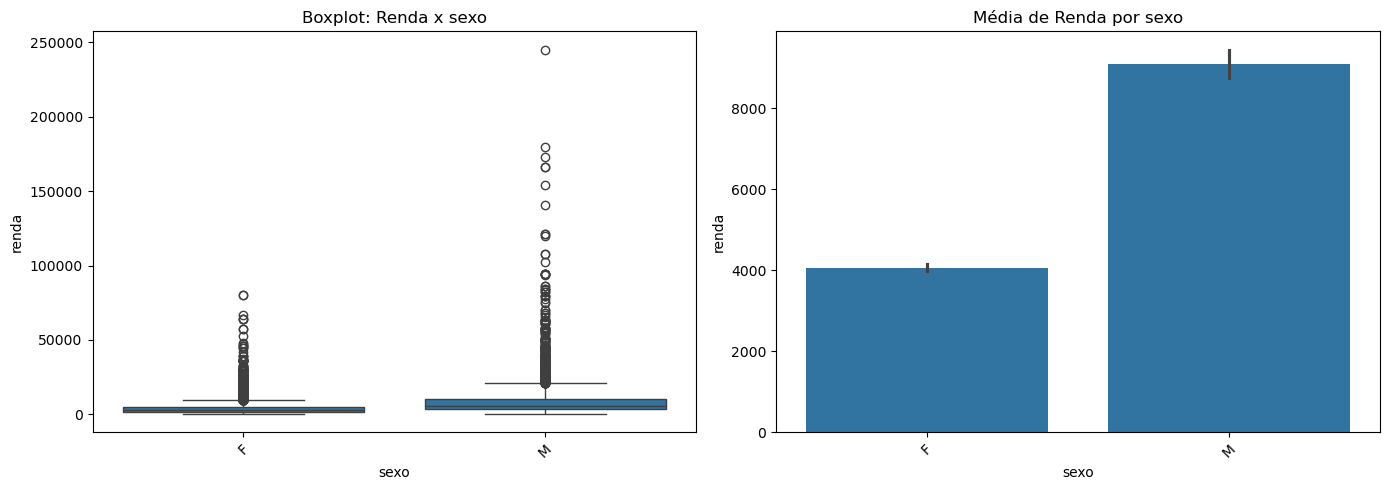

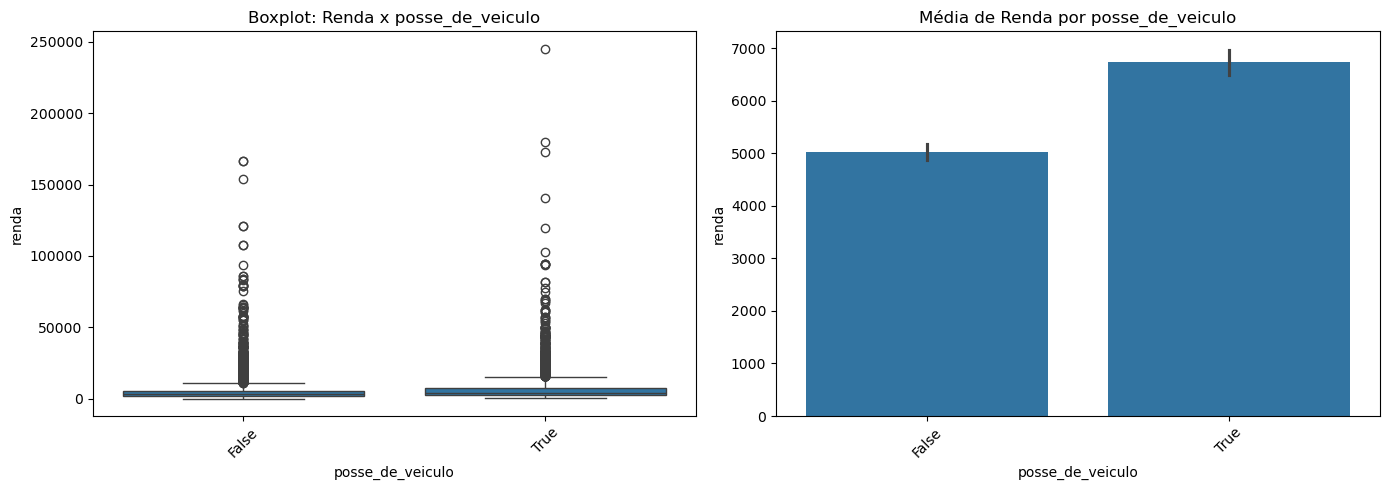

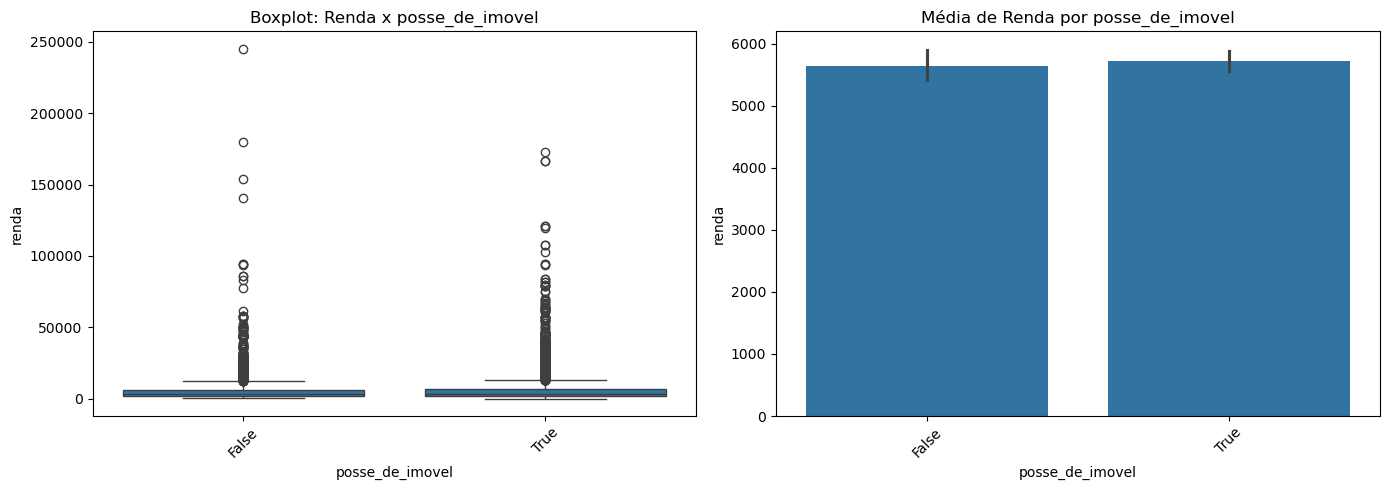

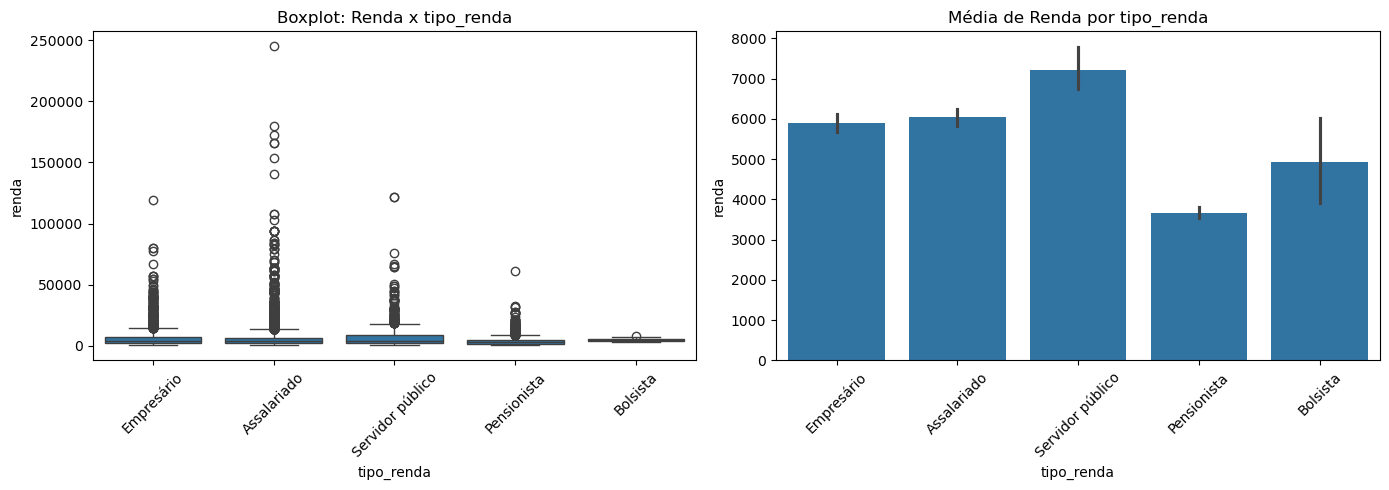

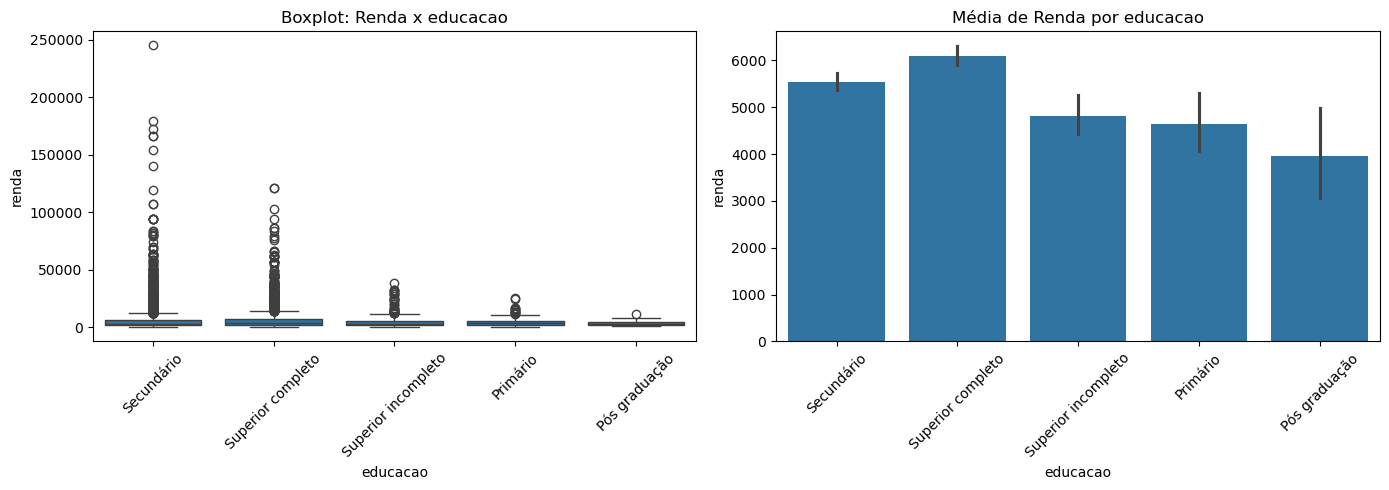

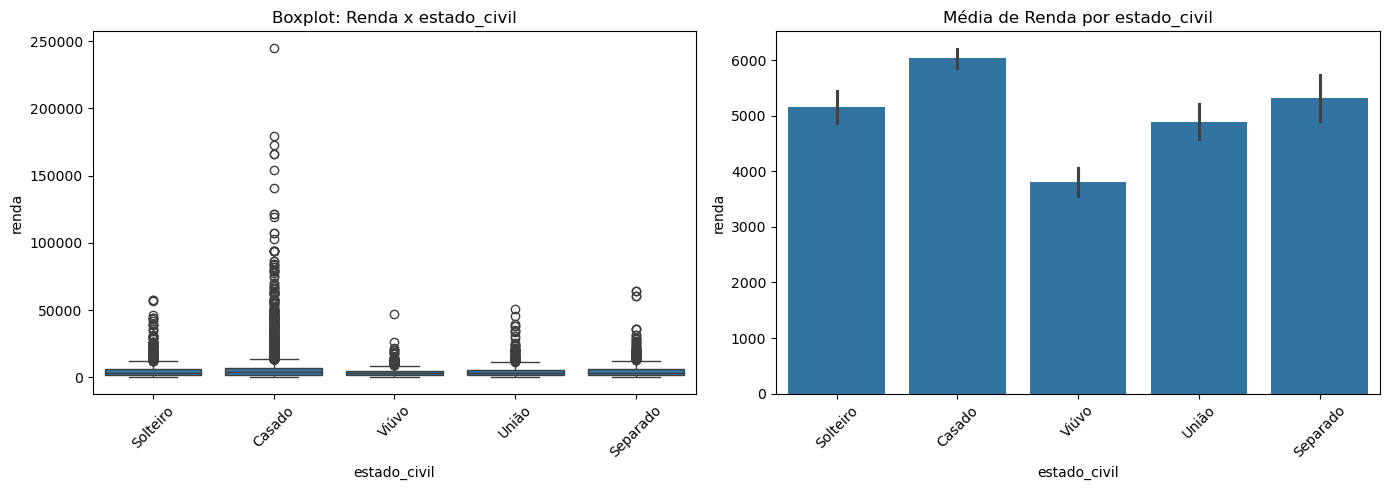

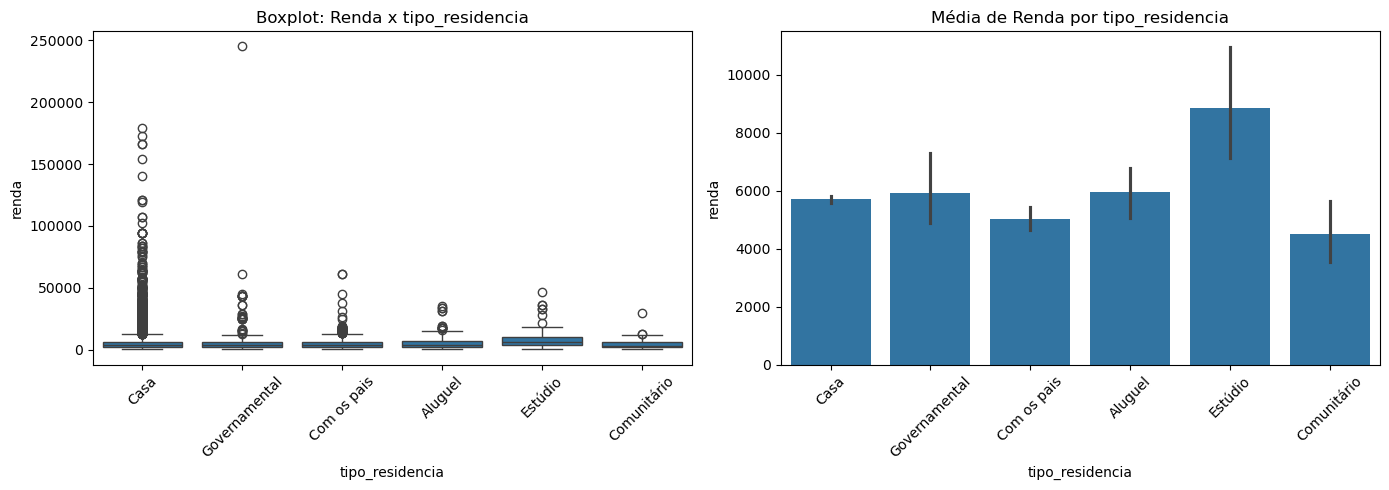

In [62]:
vars_categoricas = ["sexo", "posse_de_veiculo", "posse_de_imovel", "tipo_renda", "educacao", "estado_civil", "tipo_residencia"]

for var in vars_categoricas:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    sns.boxplot(x= var, y='renda', data=df, ax=axes[0] )
    axes[0].set_title(f"Boxplot: Renda x {var }")
    axes[0].tick_params(axis='x', rotation=45)

    sns.barplot(x=var , y='renda', data=df, estimator=np.mean, ax=axes[1])
    axes[1].set_title(f"Média de Renda por {var}")
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()


Olhando para os gráficos 

- O sexo parece ser o fator com maior impacto na distribuição de renda, com homens ganhando significativamente mais que mulheres

- O tipo de renda (ocupação) é o segundo fator mais importante, com servidores públicos tendo rendas mais altas

- O nível educacional mostra uma relação positiva com a renda, especialmente para pessoas com ensino superior completo

- Estado civil também influencia a renda, com pessoas casadas tendo rendas médias mais altas

- A posse de veículo está associada a rendas mais altas, mas a posse de imóvel surpreendentemente não mostra forte correlação

- O tipo de residência tem alguma influência, com moradores de estúdio apresentando as maiores rendas médias

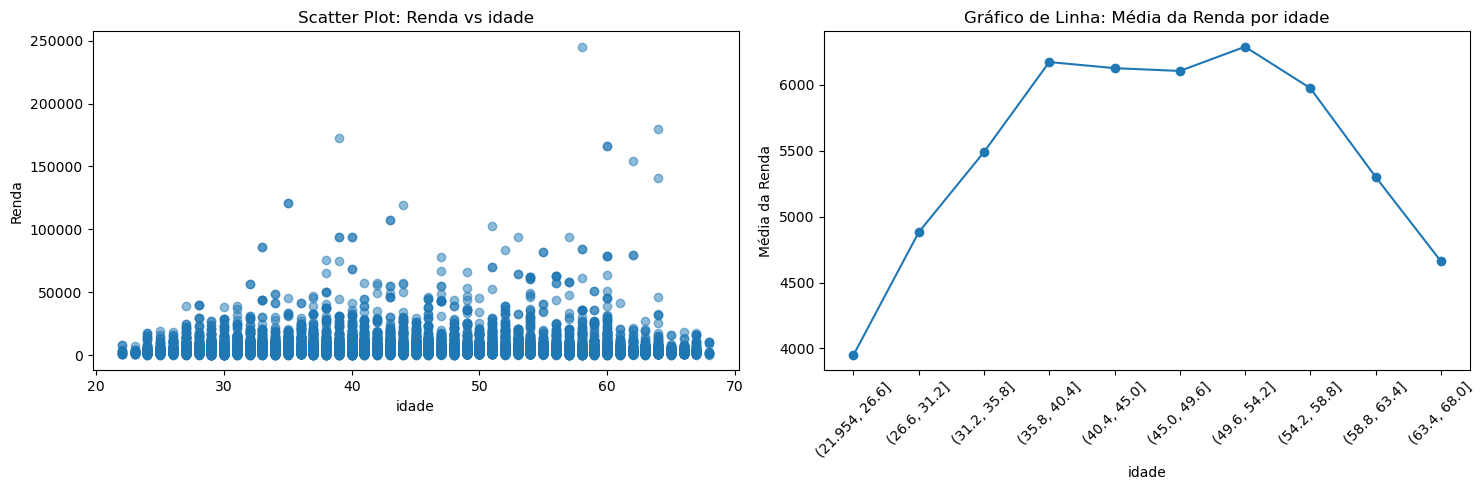

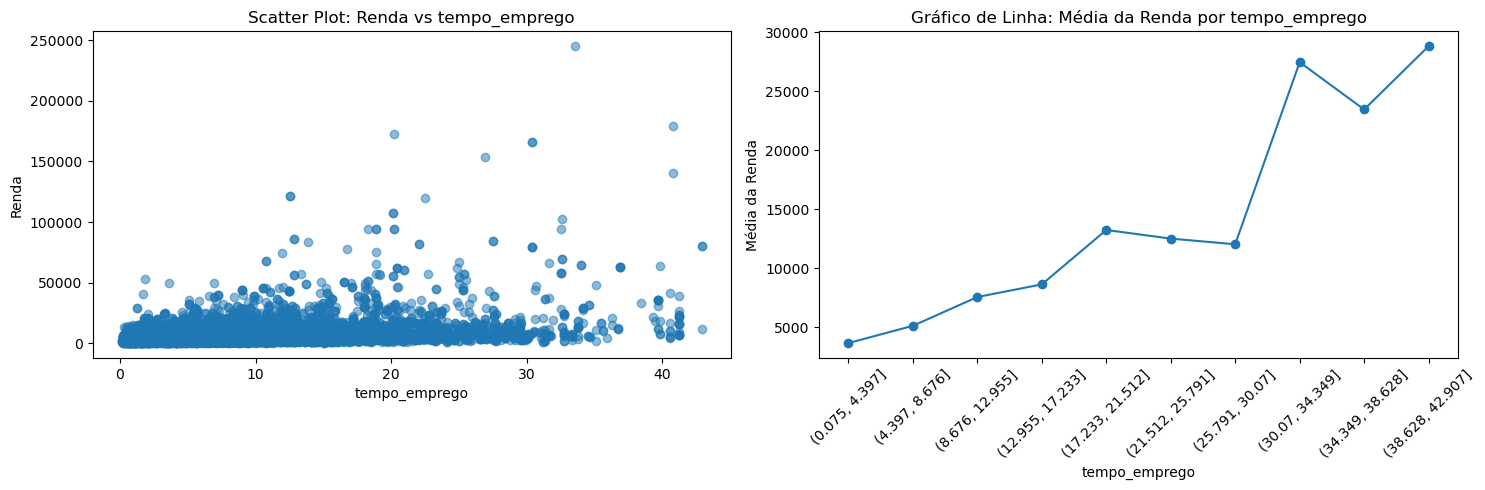

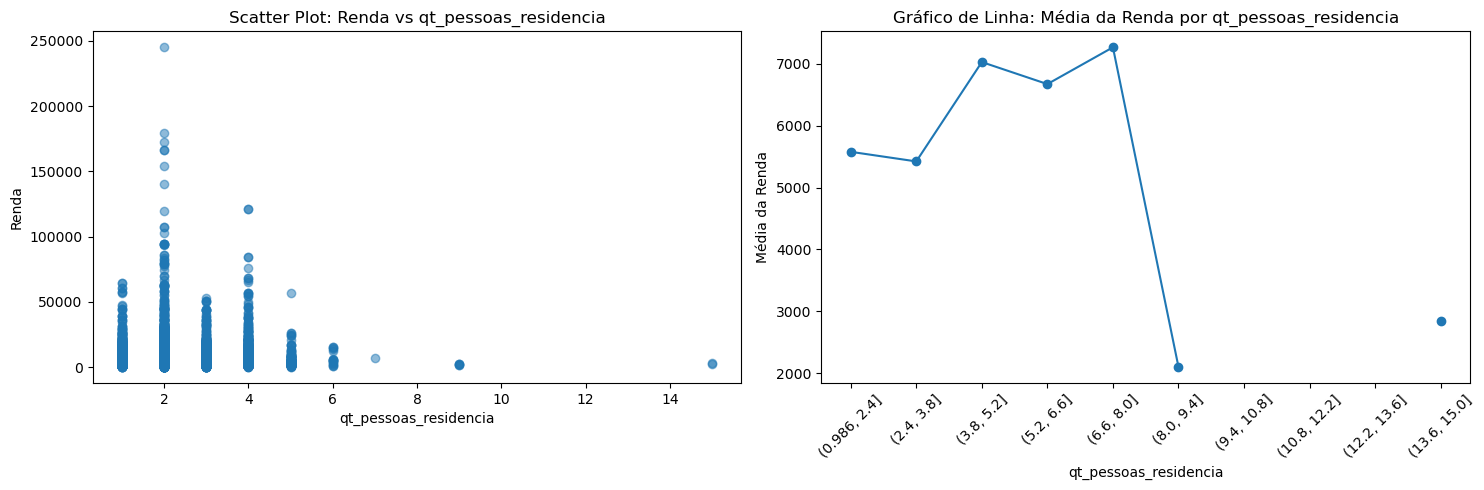

In [63]:
num_vars = ["idade", "tempo_emprego", "qt_pessoas_residencia"]


for var in num_vars:
    # Cria uma figura com dois subplots lado a lado
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Scatter Plot
    ax1.scatter(df[var], df['renda'], alpha=0.5)
    ax1.set_xlabel(var)
    ax1.set_ylabel("Renda")
    ax1.set_title(f"Scatter Plot: Renda vs {var}")
    
    # Gráfico de Linha (média da renda por intervalo da variável)
    df['bins'] = pd.cut(df[var], bins=10)  # Divide a variável em 10 intervalos
    biv = df.groupby('bins', observed=False)['renda'].mean()  # Calcula a média da renda por intervalo
    ax2.plot(biv.index.astype(str), biv.values, marker='o')
    ax2.set_xlabel(var)
    ax2.set_ylabel("Média da Renda")
    ax2.set_title(f"Gráfico de Linha: Média da Renda por {var}")
    plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização
    
    # Ajusta o layout para evitar sobreposição
    plt.tight_layout()
    plt.show()

#### Renda x Idade
    Os primeiros gráficos mostram uma relação clara em formato de "U invertido" entre idade e renda, o scatter plot apresneta maior dispersão e valores extremos (outliers) na faixa entre 40-60 anos, indicando maior variabilidade de renda nessas idades.

#### Renda x Tempo de Emprego
    A relação entre tempo de emprego e renda apresenta um padrão crescente sugerindo uma grande relação com experienca, especialmente após 30 anos, possivelmente relacionado a cargos de alta gestão ou benefícios de senioridade. Alem disso, o scatter plot mostra que, embora a tendência central seja crescente, existe grande variabilidade em todos os níveis de tempo de emprego.

#### Renda x Quantidade de Pessoas na Residência
    Os gráficos apresentam um padrão não-linear e mais complexo, sugerindo que residências com 3-7 pessoas tendem a ter maior renda, possivelmente por representarem famílias estabelecidas com múltiplos contribuintes financeiros. A queda para residências muito grandes pode indicar famílias de baixa renda com muitos dependentes. Tendo a  maior concentração de dados em residências com 1-5 pessoas, e outliers mais extremos em residências com 2 pessoas.

#### Em conclusão:
- Fase da vida profissional (representada pela idade) mostra relação clara com a renda, com pico entre 49-54 anos
- Tempo de emprego é um preditor forte de renda, com aumento substancial após 30 anos de trabalho
- Composição familiar (pessoas na residência) tem relação não-linear com a renda, favorecendo famílias médias (3-7 pessoas)


## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



#### Seleção:
    os dados já estão selecionados.

#### Limpeza:
    será preciso tratar valores faltantes na variavei "tempo_emprego"

#### Construção:
    Não há necessidade de contruir novas variaveis

#### Formatação
    ainda é necessario a formatação das variaveis qualitativas de modo a ser utilizaveis


#### Tratamento de dados faltantes:

In [64]:
df.isnull().sum()

data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
bins                        0
dtype: int64

In [65]:
df['tempo_emprego'] = df['tempo_emprego'].fillna(df['tempo_emprego'].mean())

In [66]:
categorical_cols = df.select_dtypes(include='object').columns

dummy_df = pd.get_dummies(df[categorical_cols], drop_first=False, prefix=categorical_cols)

df = df.drop(categorical_cols, axis=1)

df = pd.concat([df, dummy_df], axis=1)

df = df.drop('bins', axis=1)

In [77]:
X = df.drop('renda', axis=1)
y = df['renda']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state = 100)


In [38]:
df.head()

,id_cliente,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,bins,data_ref_2015-01-01,...,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,15056,False,True,0,26,6.602740,1.0,8060.34,"(0.986, 2.4]",True,...,False,True,False,False,False,True,False,False,False,False
1,9968,True,True,0,28,7.183562,2.0,1852.15,"(0.986, 2.4]",True,...,False,False,False,False,False,True,False,False,False,False
2,4312,True,True,0,35,0.838356,2.0,2253.89,"(0.986, 2.4]",True,...,False,False,False,False,False,True,False,False,False,False
3,10639,False,True,1,30,4.846575,3.0,6600.77,"(2.4, 3.8]",True,...,False,False,False,False,False,True,False,False,False,False
4,7064,True,False,0,33,4.293151,1.0,6475.97,"(0.986, 2.4]",True,...,False,True,False,False,False,False,False,False,False,True


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


#### Agora que os dados ja estão prontos para o treinamento de um modelo, sobra a escolha do modelo que será utilizado, como visto nas analises bivariadas, muitas das relações entre as variavel e renda sao não lineares, sendo assim, o melhor modelo dentro dos modelos ja aprendidos é o de arvore de decisão.


#### Desenho do teste

In [76]:
X = df.drop('renda', axis=1)
y = df['renda']

y_log = np.log(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=100)

# Convert boolean columns to integers
for col in X_train.select_dtypes(include=['bool']).columns:
    X_train[col] = X_train[col].astype(int)

for col in X_test.select_dtypes(include=['bool']).columns:
    X_test[col] = X_test[col].astype(int)



# Make sure X_test has the same columns as X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Now train the model on the processed data
dtree = DecisionTreeRegressor(max_depth=5, random_state=42)
dtree.fit(X_train, y_train)

# Make predictions (still in log space)
y_pred_log = dtree.predict(X_test)

# Convert predictions back to original scale
y_pred = np.exp(y_pred_log)

y_pred_log = dtree.predict(X_test)
y_pred = np.exp(y_pred_log)


y_test_original = np.exp(y_test)
# Calculate metrics in original scale
mse = mean_squared_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)
print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Coeficiente de Determinação (R²): {r2}")

Erro Quadrático Médio (MSE): 41119346.08805475
Coeficiente de Determinação (R²): 0.39321781735069505


### Rodando o modelo


In [ ]:
dtree = DecisionTreeRegressor(max_depth=5, random_state=42, min_samples_split=10, min_samples_leaf=5)


dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)
y_pred_train = dtree.predict(X_train)

mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred)      

mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print('mse treeino{mse_train}')
print('r2 treino{r2_train}')

print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Coeficiente de Determinação (R²): {r2}")

mse treeino{mse_train}
r2 treino{r2_train}
Erro Quadrático Médio (MSE): 34717052.32987545
Coeficiente de Determinação (R²): 0.48769397395666314


In [ ]:

plt.figure(figsize=(20,10))
plot_tree(dtree_pruned, filled=True, feature_names=X.columns)
plt.title(f"Decision Tree with ccp_alpha = {best_alpha}")
plt.show()

## Etapa 5 Crisp-DM: Avaliação dos resultados


In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"RMSE no conjunto de treino: {rmse_train:.2f}")
print(f"RMSE no conjunto de teste: {rmse_test:.2f}")
print(f"R² no conjunto de treino: {r2_train:.4f}")
print(f"R² no conjunto de teste: {r2_test:.4f}")

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.